## Homework 03

In [272]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, root_mean_squared_error # mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [273]:
df = pd.read_csv('bank-full.csv', sep=";")
df.shape

(45211, 17)

In [274]:
df.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [275]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Dataset

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

Or you can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
```

We need to take `bank/bank-full.csv` file from the downloaded zip-file.  
In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not. 

### Features

For the rest of the homework, you'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

### Data preparation

* Select only the features from above.
* Check if the missing values are presented in the features.

In [276]:
columns = [  "age",
    "job",
    "marital",
    "education",
    "balance",
    "housing",
    "contact",
    "day",
    "month",
    "duration",
    "campaign",
    "pdays",
    "previous",
    "poutcome",
    "y",
]

In [277]:
data = df[columns]
data.head(10).T


,0,1,2,3,4,5,6,7,8,9
age,58,44,33,47,33,35,28,42,58,43
job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired,technician
marital,married,single,married,married,single,married,single,divorced,married,single
education,tertiary,secondary,secondary,unknown,unknown,tertiary,tertiary,tertiary,primary,secondary
balance,2143,29,2,1506,1,231,447,2,121,593
housing,yes,yes,yes,yes,no,yes,yes,yes,yes,yes
contact,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5,5,5,5,5,5
month,may,may,may,may,may,may,may,may,may,may
duration,261,151,76,92,198,139,217,380,50,55


In [278]:
data.nunique()

age            77
job            12
marital         3
education       4
balance      7168
housing         2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [279]:
data.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [280]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [281]:
df.describe(include="O")

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [282]:
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [283]:
# df['education'].mode()[0]
df.education.mode()[0]

'secondary'

### Question 1

What is the most frequent observation (mode) for the column `education`?
- `secondary` -- 23202


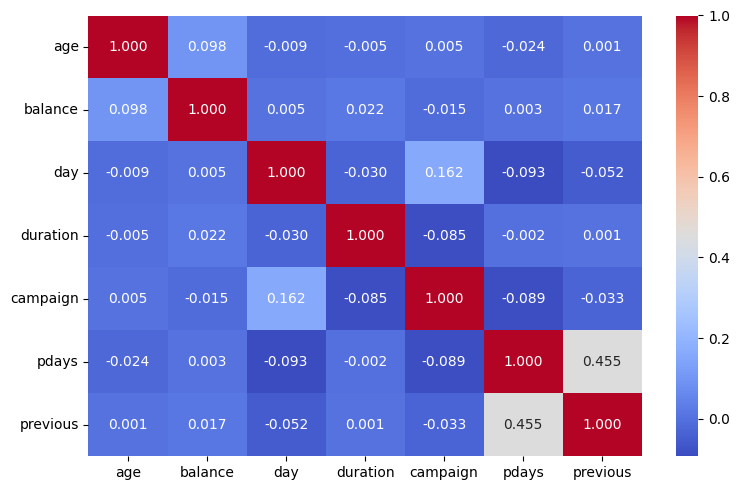

In [284]:
numerical = [
    "age",
    "balance",
    "day",
    "duration",
    "campaign",
    "pdays",
    "previous",
]

correlation_matrix = df[numerical].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt=".3f")
plt.xticks()
plt.tight_layout()
plt.show()



In [285]:
correlation_pairs = (df[numerical].corr().unstack().sort_values(ascending=True).drop_duplicates())

# drop age vs age correlation
correlation_pairs = correlation_pairs.drop(correlation_pairs.index[-1])

correlation_pairs = correlation_pairs[correlation_pairs != 1]

max_correlation = correlation_pairs.idxmax()  # Pair of features with the highest correlation
max_correlation_value = correlation_pairs.max()  # Value of the highest correlation

print(f"The pair of features with the highest correlation is: {max_correlation} with a correlation of {max_correlation_value:.2f}")

The pair of features with the highest correlation is: ('previous', 'pdays') with a correlation of 0.45


### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `pdays` and `previous` -- 0.45

### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.




In [286]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [287]:
df['y'] = (df['y'] == 'yes').astype(int)

In [288]:
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.


In [289]:
seed = 42

# First, split the data into 60% training and 40% remaining (validation + test)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)

# Then, split the remaining 40% into 20% validation and 20% test sets
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

# Print the shapes of the resulting splits to confirm
print(f"Training set shape: {df_train.shape}")
print(f"Validation set shape: {df_val.shape}")
print(f"Test set shape: {df_test.shape}")

Training set shape: (27126, 17)
Validation set shape: (9042, 17)
Test set shape: (9043, 17)


In [290]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['y'].values
y_val = df_val['y'].values
y_test = df_test['y'].values


In [291]:
categorical_columns = ["job",
    "marital",
    "education",
    "housing",
    "contact",
    "month",
    "poutcome",
]

In [292]:
global_y_rate = df_full_train.y.mean()
round(global_y_rate, 2)

np.float64(0.12)

In [293]:
for c in categorical_columns:
    print(c)
    df_group = df_full_train.groupby(c).y.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_y_rate
    df_group['risk'] = df_group['mean'] / global_y_rate
    df_group.sort_values("risk", ascending=False, inplace=True)
    display(df_group)
    print()
    print()

job


,mean,count,diff,risk
job,,,,
student,0.278976,742,0.162906,2.403524
retired,0.222590,1815,0.106520,1.917727
unemployed,0.160313,1023,0.044243,1.381180
management,0.135467,7500,0.019397,1.167117
self-employed,0.122862,1286,0.006792,1.058518
admin.,0.119894,4137,0.003824,1.032947
unknown,0.111588,233,-0.004481,0.961390
technician,0.108760,6096,-0.007310,0.937024
housemaid,0.093812,1002,-0.022257,0.808243




marital


,mean,count,diff,risk
marital,,,,
single,0.147637,10221,0.031568,1.271973
divorced,0.119720,4143,0.003651,1.031451
married,0.100578,21804,-0.015492,0.866532




education


,mean,count,diff,risk
education,,,,
tertiary,0.148970,10539,0.032901,1.283460
unknown,0.127444,1483,0.011375,1.098001
secondary,0.105303,18670,-0.010767,0.907238
primary,0.086377,5476,-0.029693,0.744183




housing


,mean,count,diff,risk
housing,,,,
no,0.166407,16033,0.050337,1.433683
yes,0.075987,20135,-0.040082,0.654669




contact


,mean,count,diff,risk
contact,,,,
cellular,0.148270,23464,0.032200,1.277422
telephone,0.137128,2319,0.021059,1.181431
unknown,0.038613,10385,-0.077456,0.332675




month


,mean,count,diff,risk
month,,,,
mar,0.516043,374,0.399973,4.445983
sep,0.465517,464,0.349448,4.010678
dec,0.464481,183,0.348411,4.001749
oct,0.437396,599,0.321326,3.768396
apr,0.202645,2344,0.086576,1.745895
feb,0.156723,2112,0.040654,1.350256
aug,0.110954,4966,-0.005115,0.955932
nov,0.101481,3173,-0.014588,0.874315
jun,0.098888,4318,-0.017181,0.851976




poutcome


,mean,count,diff,risk
poutcome,,,,
success,0.641322,1210,0.525253,5.525332
other,0.170341,1497,0.054271,1.467575
failure,0.126891,3901,0.010821,1.093229
unknown,0.090392,29560,-0.025677,0.778779


### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `poutcome` -- 0.03

In [296]:
def mutual_info_y_score(series):
    return mutual_info_score(series, df_train.y)

df_mi = df_train[categorical_columns].apply(mutual_info_y_score).round(2)
df_mi.sort_values(ascending=False).to_frame(name="MI")

,MI
poutcome,0.03
month,0.03
job,0.01
contact,0.01
housing,0.01
education,0.00
marital,0.00


* Make sure that the target value `y` is not in your dataframe.

In [297]:
del df_train['y']
del df_val['y']
del df_test['y']

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.

In [300]:
dv = DictVectorizer(sparval_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)se=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`


In [309]:
# model = LogisticRegression(solver='lbfgs', max_iter=100000)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=seed)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [310]:
val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [307]:
accuracy = np.round(accuracy_score(y_val, y_pred), 2)
accuracy

np.float64(0.9)

features

### Question 5
* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

In [314]:
features = df_train.columns.to_list()

scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])

full_dv = DictVectorizer(sparse=False)
full_train_dict = df_train[features].to_dict(orient='records')
full_X_train = full_dv.fit_transform(full_train_dict)

full_val_dict = df_val[features].to_dict(orient='records')
full_X_val = full_dv.fit_transform(full_val_dict)

In [318]:
original_score = accuracy

for feature in features:
    keep_columns = [
        col for col in full_dv.get_feature_names_out() if not col.startswith(feature)
    ]

    X_train = full_X_train[:, [full_dv.vocabulary_[col] for col in keep_columns]]
    X_val = full_X_val[:, [full_dv.vocabulary_[col] for col in keep_columns ]]
    
    model = LogisticRegression(
        solver="liblinear", max_iter=1000, C=1.0, random_state=seed    
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    scores.loc[len(scores)] = [feature, score, original_score - score]
    

In [319]:
# Calculate absolute difference
scores["difference"] = scores["difference"].abs()
scores = scores.sort_values(by="difference", ascending=True).reset_index(drop=True)

print(scores)

# Identify the feature with the smallest difference
smallest_diff_feature = scores.iloc[0]["eliminated_feature"]
print(f"\nThe feature with the smallest difference is: {smallest_diff_feature}")

   eliminated_feature  accuracy  difference
0                loan  0.900022    0.000022
1            campaign  0.900022    0.000022
2               pdays  0.900133    0.000133
3            previous  0.900133    0.000133
4               month  0.899801    0.000199
5             balance  0.899801    0.000199
6                 job  0.900243    0.000243
7             default  0.900243    0.000243
8           education  0.900354    0.000354
9             housing  0.899469    0.000531
10                age  0.900575    0.000575
11            contact  0.900686    0.000686
12            marital  0.900796    0.000796
13                day  0.900796    0.000796
14           poutcome  0.894382    0.005618
15           duration  0.889847    0.010153

The feature with the smallest difference is: loan


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column price. Apply the logarithmic transformation to this column.

In [320]:
y_train.shape, y_val.shape,

((27126,), (9042,))

In [321]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

In [322]:
# import warnings
scores = {}
for C in [0.01, 0.1, 1, 10, 100]:

    # warnings.filterwarnings("ignore")

    model = LogisticRegression(C=C, solver="liblinear", random_state=seed, max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred,) # root_mean_squared_error
    scores[C] = round(score, 3)
    print(f"C = {C:>4}: accuracy_score = {round(score, 3)}")

C = 0.01: accuracy_score = 0.898
C =  0.1: accuracy_score = 0.9
C =    1: accuracy_score = 0.9
C =   10: accuracy_score = 0.9
C =  100: accuracy_score = 0.9
